In [ ]:
# Select python kernel in jupyter notebook to run this script
# Python 3.12.4
# install the dependencies from the requirements.txt file

In [71]:
pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [90]:
# import the dataset
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dataset.csv')

In [91]:
# Data characteristics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      2498 non-null   object
 1   Adj Close  2498 non-null   object
 2   Close      2498 non-null   object
 3   High       2498 non-null   object
 4   Low        2498 non-null   object
 5   Open       2498 non-null   object
 6   Volume     2498 non-null   object
dtypes: object(7)
memory usage: 136.7+ KB
None


In [92]:
print(df.describe())

             Price          Adj Close              Close  High  \
count         2498               2498               2498  2498   
unique        2498               2451               2451  2436   
top     2024-12-03  125.9800033569336  125.9800033569336  87.5   
freq             1                  3                  3     3   

                       Low              Open    Volume  
count                 2498              2498      2498  
unique                2443              2403      2466  
top     49.099998474121094  81.1500015258789  60512000  
freq                     4                 3         3  


In [95]:
# Data Collection and Manipulation

# Handling missing data
df = df.dropna()

# remove the first row of the dataset as it contains the column names and not the actual data
df = df.iloc[1:]

# Convert 'Close' column to numeric values
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Add a new column 'Daily Return' 
df['Daily Return'] = df['Close'].pct_change().fillna(0)

print(df.head())


        Price           Adj Close    Close                High  \
3  2015-01-06   14.76449966430664  14.7645  15.149999618530273   
4  2015-01-07  14.920999526977539  14.9210  15.064000129699707   
5  2015-01-08   15.02299976348877  15.0230  15.156999588012695   
6  2015-01-09  14.846500396728516  14.8465  15.143500328063965   
7  2015-01-12  14.570500373840332  14.5705   14.92549991607666   

                  Low                Open    Volume  Daily Return  
3  14.619000434875488  15.112000465393066  70380000      0.000000  
4  14.766500473022461              14.875  52806000      0.010600  
5  14.805500030517578  15.015999794006348  61768000      0.006836  
6  14.833999633789062  15.074000358581543  51848000     -0.011749  
7   14.46399974822998  14.878000259399414  68428000     -0.018590  


In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Adj Close' , 'Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(df[['Adj Close' , 'Open', 'High', 'Low', 'Close', 'Volume']])

print(df.head())

        Price  Adj Close     Close      High       Low      Open    Volume  \
3  2015-01-06   0.002088  0.002088  0.003032  0.001813  0.003993  0.114808   
4  2015-01-07   0.002871  0.002871  0.002605  0.002563  0.002807  0.076562   
5  2015-01-08   0.003382  0.003382  0.003067  0.002762  0.003513  0.096066   
6  2015-01-09   0.002498  0.002498  0.003000  0.002907  0.003803  0.074477   
7  2015-01-12   0.001116  0.001116  0.001917  0.001025  0.002822  0.110560   

   Daily Return  
3      0.000000  
4      0.010600  
5      0.006836  
6     -0.011749  
7     -0.018590  


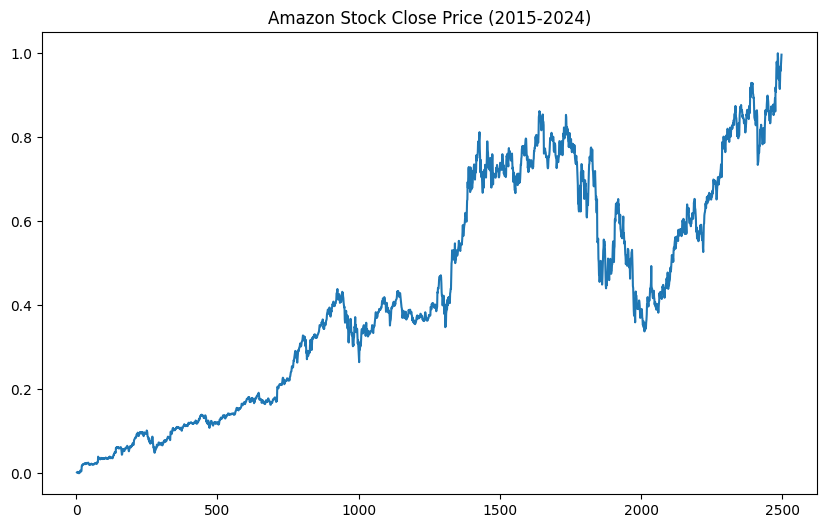

In [101]:
# Data Visualization
import matplotlib.pyplot as plt

df['Close'].plot(title='Amazon Stock Close Price (2015-2024)', figsize=(10, 6))
plt.show()

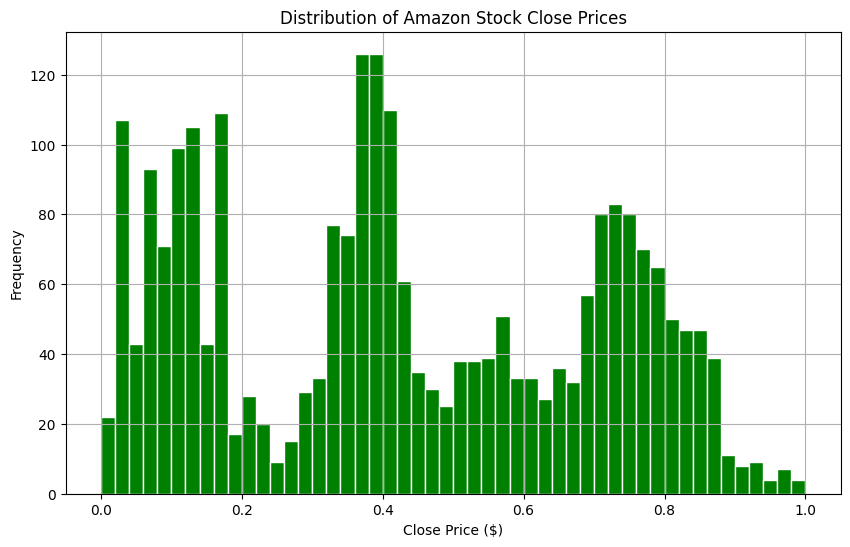

In [109]:
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='green', edgecolor='white')
plt.title('Distribution of Amazon Stock Close Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

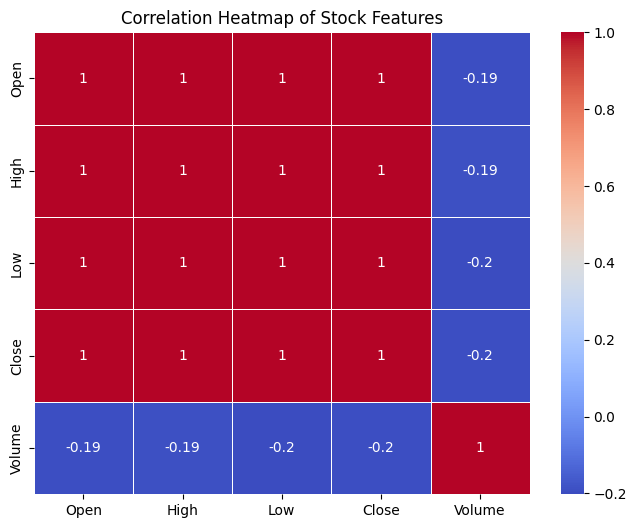

In [ ]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Features')
plt.show()

In [128]:
df['price_movement'] = (df['Close'].shift(-1) > df['Close']).astype(int)
print(df['price_movement'].value_counts()) 

price_movement
1    1336
0    1159
Name: count, dtype: int64


In [ ]:
# Machine Learning algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a binary target variable: 1 if price went up, 0 if price went down
df['price_movement'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Prepare the data for classification
X_class = df[['Open', 'High', 'Low', 'Volume']] 
y_class = df['price_movement'] 

# Split the data into training and testing sets (75% train, 25% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.25, shuffle=False)

Logistic Regression - Accuracy: 0.5256, Precision: 0.5259, Recall: 0.9046, F1 Score: 0.6652


In [143]:
# Initialize and train the model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_class, y_train_class)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_class)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_log_reg)
precision = precision_score(y_test_class, y_pred_log_reg)
recall = recall_score(y_test_class, y_pred_log_reg)
f1 = f1_score(y_test_class, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")